# Intro

This is the second practical homework for the ML seminar. In this homework we will look at the following ideas (which are presented in the **first pages of the file containing the Notes for Seminar/Week 4**) and we will apply them using a decision tree and a Naive Bayes model:

- splitting data into: 
  - (train, validation, test) or just...
  - ... (train, test) and using cross-validation (LOOCV or k-fold)
- choosing the best model from a set of models: decision tree using the information gain, decision tree using the Gini index, Gaussian Naive Bayes
- testing using your own images of drawn digits

We will use the output from the previous homework. (We give it to you below.)

Observation: All the algorithms we will use consider the input columns continuous and not discrete.

---


### Tools:

- other **packages** than those used in the first HW: 
  - **sklearn**: "is an open source Python library that implements a range of machine learning, pre-processing, cross-validation and visualization algorithms using a unified interface." (text source: [here](https://www.geeksforgeeks.org/learning-model-building-scikit-learn-python-machine-learning-library/))
  - **matplotlib**: we use matplotlib.pyplot to show images on screen, but also for creating plots

# Get the output from the previous homework

In [4]:
# Data is at: https://drive.google.com/file/d/1b9I3lywpGKpFpJg9dXYmE5HMTgwTHgl0/view?usp=sharing
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1b9I3lywpGKpFpJg9dXYmE5HMTgwTHgl0' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1b9I3lywpGKpFpJg9dXYmE5HMTgwTHgl0" -O mnist_Xy.zip && rm -rf /tmp/cookies.txt

--2020-11-03 21:25:43--  https://docs.google.com/uc?export=download&confirm=&id=1b9I3lywpGKpFpJg9dXYmE5HMTgwTHgl0
Resolving docs.google.com (docs.google.com)... 74.125.204.113, 74.125.204.102, 74.125.204.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.204.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-5o-docs.googleusercontent.com/docs/securesc/77ud3dlchp57kjl9noc7ctktniogpp8q/20dfpfjdplaga2vk3gqd2ag2psq6p051/1604438700000/03293566965117062760/03230501036497495386Z/1b9I3lywpGKpFpJg9dXYmE5HMTgwTHgl0?e=download [following]
--2020-11-03 21:25:44--  https://doc-04-5o-docs.googleusercontent.com/docs/securesc/77ud3dlchp57kjl9noc7ctktniogpp8q/20dfpfjdplaga2vk3gqd2ag2psq6p051/1604438700000/03293566965117062760/03230501036497495386Z/1b9I3lywpGKpFpJg9dXYmE5HMTgwTHgl0?e=download
Resolving doc-04-5o-docs.googleusercontent.com (doc-04-5o-docs.googleusercontent.com)... 74.125.203.132, 2404:6800:4008:c03::84
Connecting to 

In [5]:
!unzip mnist_Xy.zip

Archive:  mnist_Xy.zip
  inflating: mnist_X.npy             
  inflating: mnist_y.npy             


In [6]:
import numpy as np
X = np.load("mnist_X.npy")
y = np.load("mnist_y.npy")

# Split data...

In [7]:
import sklearn
import sklearn.model_selection

## a) ... into (train, validation, test) 

Use the following percentages 60% (train), 20% (for validation), 20% (for test). 

Hint: Do not take the first 60% (train) rows of `X`, then the next 20% (validation), then the next 20% (test), because you will end up having in the training dataset only images of 0, 1, 2, 3, 4, 5!!! And in the validation dataset, images only of 5, 6, 7!!! And in the test dataset, only of 7, 8, 9!!! You should shuffle first the dataset or use a specialized function like `sklearn.model_selection.train_test_split`.

In [8]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.6, test_size=0.2, shuffle=True)
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X, y, train_size=0.6, test_size=0.2, shuffle=True)

#### Check distribution of labels in each subset

In the seminar notes, I told you an extra information that the distribution of labels (in train, validation, test) should be the same as in the original dataset. Check the following plots to see if this is the case.

You should see that this is *almost* the case. This is very good and acceptable! But if you want the distributions to be more alike, use the parameter `stratify` from the function `sklearn.model_selection.train_test_split` when splitting the original dataset (previous step).

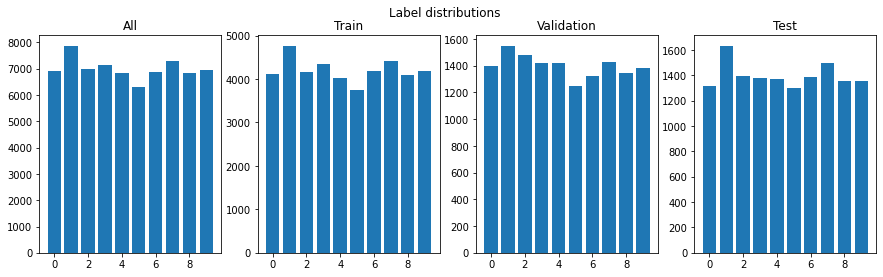

In [9]:
import matplotlib.pyplot as plt

(digits, counts_y) = np.unique(y, return_counts=True)
(_, counts_y_train) = np.unique(y_train, return_counts=True)
(_, counts_y_val) = np.unique(y_val, return_counts=True)
(_, counts_y_test) = np.unique(y_test, return_counts=True)

fig, (subplot_all, subplot_train, subplot_val, subplot_test) = plt.subplots(1,4,figsize=(15,4))
fig.suptitle('Label distributions')

subplot_all.bar(digits,counts_y)
subplot_all.set_title('All')

subplot_train.bar(digits,counts_y_train)
subplot_train.set_title('Train')

subplot_val.bar(digits,counts_y_val)
subplot_val.set_title('Validation')

subplot_test.bar(digits,counts_y_test)
subplot_test.set_title('Test')

fig.show()

"One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

Let's standardize our dataset." (from https://www.coursera.org/learn/neural-networks-deep-learning/notebook/zAgPl/logistic-regression-with-a-neural-network-mindset)

In [10]:
v = np.array([1,2,3])
# array programming
v > 2

array([False, False,  True])

In [11]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

### Decision tree with "information gain"

#### Train a decision tree

Hint: Use `sklearn.tree` and use `criterion="entropy"` to have an algorithm close to ID3.

Also, show the training time.

Hint: Use a Google Colab magic to show the training time. See https://www.tutorialspoint.com/google_colab/google_colab_magics.htm 

In [12]:
import sklearn.tree
%time dtig = sklearn.tree.DecisionTreeClassifier(criterion="entropy").fit(X_train, y_train)

CPU times: user 15.4 s, sys: 58.4 ms, total: 15.4 s
Wall time: 15.4 s


#### Compute accuracy on the training and validation datasets.

Hint: Use `model.score(INPUT,OUTPUT)` (or `sklearn.metrics.accuracy_score`).

In [13]:
import sklearn.metrics

acc_train_dtig = dtig.score(X_train, y_train)
acc_val_dtig = dtig.score(X_val, y_val)

print("Training accuracy: " + str(acc_train_dtig))
print("Validation accuracy: " + str(acc_val_dtig))

Training accuracy: 1.0
Validation accuracy: 0.8667857142857143


### Decision tree with "Gini index"

#### Train a decision tree

Also, show the training time.

In [14]:
%time dtgi = sklearn.tree.DecisionTreeClassifier(criterion="gini").fit(X_train, y_train)

CPU times: user 13.4 s, sys: 6.57 ms, total: 13.4 s
Wall time: 13.5 s


#### Compute accuracy on the training and validation datasets.

Hint: Use `model.score(INPUT,OUTPUT)` (or `sklearn.metrics.accuracy_score`).

In [15]:
acc_train_dtgi = dtgi.score(X_train, y_train)
acc_val_dtgi = dtgi.score(X_val, y_val)

print("Training accuracy: " + str(acc_train_dtgi))
print("Validation accuracy: " + str(acc_val_dtgi))

Training accuracy: 1.0
Validation accuracy: 0.8642857142857143


### Gaussian Naive Bayes

Observation: this is the Naive Bayes version which accepts as input continuous attributes.

#### Train a Naive Bayes model

Also, show the training time.

In [16]:
import sklearn.naive_bayes
%time gnb = sklearn.naive_bayes.GaussianNB().fit(X_train, y_train)

CPU times: user 374 ms, sys: 55 ms, total: 429 ms
Wall time: 429 ms


#### Compute accuracy on the training and validation datasets.

Hint: Use `model.score(INPUT,OUTPUT)` (or `sklearn.metrics.accuracy_score`).

In [17]:
acc_train_gnb = gnb.score(X_train, y_train)
acc_val_gnb = gnb.score(X_val, y_val)

print("Training accuracy: " + str(acc_train_gnb))
print("Validation accuracy: " + str(acc_val_gnb))

Training accuracy: 0.5651428571428572
Validation accuracy: 0.5561428571428572


### Choose the best model

Decision tree with "information gain" because it has the highest accuracy on never seen before data (validation accuracy).



### Train the chosen model on `X_train,y_train` and `X_val,y_val` combined

In [18]:
X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))
%time dtig = dtig.fit(X_train_val, y_train_val)

CPU times: user 19.7 s, sys: 2.8 ms, total: 19.7 s
Wall time: 19.7 s


### Compute the testing accuracy of this new model

This number will play the role of an unbiased estimate of how well the model works in reality.

In [19]:
acc_test_dtig = dtig.score(X_test, y_test)

print("Test accuracy: " + str(acc_test_dtig))

Test accuracy: 0.9755


### Test the new model on a new image of your own

In [20]:
from PIL import Image
import numpy as np
def readImage(filePath,resize=None,colorMode=None):
  """Read an image from disk.

  Keyword arguments:
  filePath -- where the image is located on disk
  resize -- if not None, then it is of the form (imageHeight, imageWidth); the image will be resized accordingly
  colorMode -- if not None, then it is "rgb" or "grayscale"; the image will be converted to this mode
  """
  im = Image.open(filePath)
  if colorMode:
    if colorMode == "grayscale":
      colorMode = "L"
    elif colorMode == "rgb":
      colorMode = "RGB"
    im = im.convert(colorMode)
  if resize:
    im = im.resize(resize)
  im = np.asarray(im)
  return im

In [21]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving img.png to img.png
User uploaded file "img.png" with length 1693 bytes


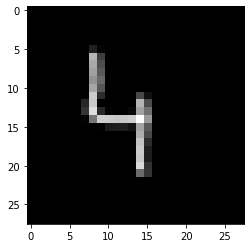

In [22]:
test_img=readImage(fn,resize=(28,28),colorMode="grayscale")

test_img=test_img/255  # DONT'T FORGET TO PREPROCESS/STANDARDIZE as above!

plt.imshow(test_img,cmap="gray")

In [23]:
flat_test_img = test_img.reshape((1,-1))
label = dtig.predict(flat_test_img)
print("The model says this is digit ",label[0])

The model says this is digit  4


## b) ... into (train,test) and use cross-validation (LOOCV or k-fold)

Use the following percentages 70% (train), 30% (for test).

In [24]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.7, test_size=0.3, shuffle=True)

"One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

Let's standardize our dataset." (from https://www.coursera.org/learn/neural-networks-deep-learning/notebook/zAgPl/logistic-regression-with-a-neural-network-mindset)

In [25]:
X_train = X_train / 255
X_test = X_test / 255

### Choose between LOOCV and k-fold CV

For each algorithm above estimate by hand (manually) the time necessary to apply LOOCV assuming that the time to train on 70\% of the data is the same as for training on 60\% of the data. You get this latter time from the output of a cell above where you used a Google Colab magic. If any time is more than 1 day (and it should be...), then you should use k-fold cross-validation instead of LOOCV. 

Estimate in the same way the time for k-fold CV where k=10.

#### Decision tree with "information gain"

LOOCV

In [26]:
import sklearn.model_selection

10-fold

#### Decision tree with "Gini index"

LOOCV

10-fold

#### Gaussian Naive Bayes

LOOCV

10-fold

### Apply LOOCV or k-fold CV (your choice)

Compute the LOOCV or k-fold CV accuracy.

Hint: Use `sklearn.model_selection.LeaveOneOut` or `sklearn.model_selection.KFold` (or, simpler, `sklearn.model_selection.cross_val_score`). In the latter case you can use k=10.

**Dont't forget that we apply LOOCV or k-fold CV on `X_train` and `y_train`, and NOT on `X` and `y`.**

#### Decision tree with "information gain"

In [27]:
acc_train = sklearn.model_selection.cross_val_score(dtig, X_train, y_train, cv=10)
print("Training accuracy: " + str(acc_train))

Training accuracy: [0.87       0.87142857 0.87163265 0.87265306 0.87061224 0.87693878
 0.87142857 0.87       0.86653061 0.8722449 ]


#### Decision tree with "Gini index"

In [28]:
acc_train = sklearn.model_selection.cross_val_score(dtgi, X_train, y_train, cv=10)
print("Training accuracy: " + str(acc_train))

Training accuracy: [0.86632653 0.86020408 0.86040816 0.86326531 0.86510204 0.87265306
 0.8577551  0.86244898 0.86326531 0.85959184]


#### Gaussian Naive Bayes

In [29]:
acc_train = sklearn.model_selection.cross_val_score(gnb, X_train, y_train, cv=10)
print("Training accuracy: " + str(acc_train))

Training accuracy: [0.56877551 0.56408163 0.57693878 0.53673469 0.55428571 0.56020408
 0.56       0.55346939 0.5677551  0.56102041]


### Choose the best model


10fold Decision tree with "information gain" has the highest validation accuracy mean of all 3.

### Train the chosen model on `X_train,y_train` and `X_val,y_val` combined

In [30]:
X_train_val, y_train_val = [], []
init = False
for train, val in sklearn.model_selection.KFold(n_splits=10).split(X_train):
  if not init:
    X_train_val = np.concatenate((X_train[train], X_train[val]))
    y_train_val = np.concatenate((y_train[train], y_train[val]))
  else:
    X_train_val = np.concatenate((X_train_val, X_train[train], X_train[val]))
    y_train_val = np.concatenate((y_train_val, y_train[train], y_train[val]))

%time dtig = sklearn.tree.DecisionTreeClassifier(criterion="entropy").fit(X_train_val, y_train_val)

CPU times: user 17.5 s, sys: 2 ms, total: 17.5 s
Wall time: 17.5 s


### Compute the testing accuracy of this new model

This number will play the role of an unbiased estimate of how well the model works in reality.

In [31]:
acc_test_dtig = dtig.score(X_test, y_test)

print("Test accuracy: " + str(acc_test_dtig))

Test accuracy: 0.8788571428571429


### Test the new model on a new image of your own

In [32]:
from PIL import Image
import numpy as np
def readImage(filePath,resize=None,colorMode=None):
  """Read an image from disk.

  Keyword arguments:
  filePath -- where the image is located on disk
  resize -- if not None, then it is of the form (imageHeight, imageWidth); the image will be resized accordingly
  colorMode -- if not None, then it is "rgb" or "grayscale"; the image will be converted to this mode
  """
  im = Image.open(filePath)
  if colorMode:
    if colorMode == "grayscale":
      colorMode = "L"
    elif colorMode == "rgb":
      colorMode = "RGB"
    im = im.convert(colorMode)
  if resize:
    im = im.resize(resize)
  im = np.asarray(im)
  return im

In [33]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving img.png to img (1).png
User uploaded file "img.png" with length 1693 bytes


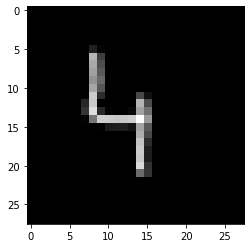

In [34]:
test_img=readImage(fn,resize=(28,28),colorMode="grayscale")

test_img=test_img/255 # DONT'T FORGET TO PREPROCESS/STANDARDIZE as above!

plt.imshow(test_img,cmap="gray")

In [35]:
flat_test_img = test_img.reshape((1,-1))
label = dtig.predict(flat_test_img)
print("The model says this is digit ",label[0])

The model says this is digit  4
